# Decision Tree Models Demo
This notebook demonstrates custom decision tree models using the Iris dataset for classification. It includes data import, training, evaluation, and visualization.

## 1. Import Required Libraries
We will use numpy, pandas, matplotlib, and scikit-learn for data handling and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 2. Import Decision Tree Models
Import custom decision tree classes from your codebase.

In [2]:
from models.decision_tree import ClassificationStumpErrorRate, ClassificationStumpInfoGain, DecisionTree

## 3. Load and Explore Dataset
We will use the Iris dataset for classification. Let's load and visualize it.

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = [target_names[i] for i in y]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


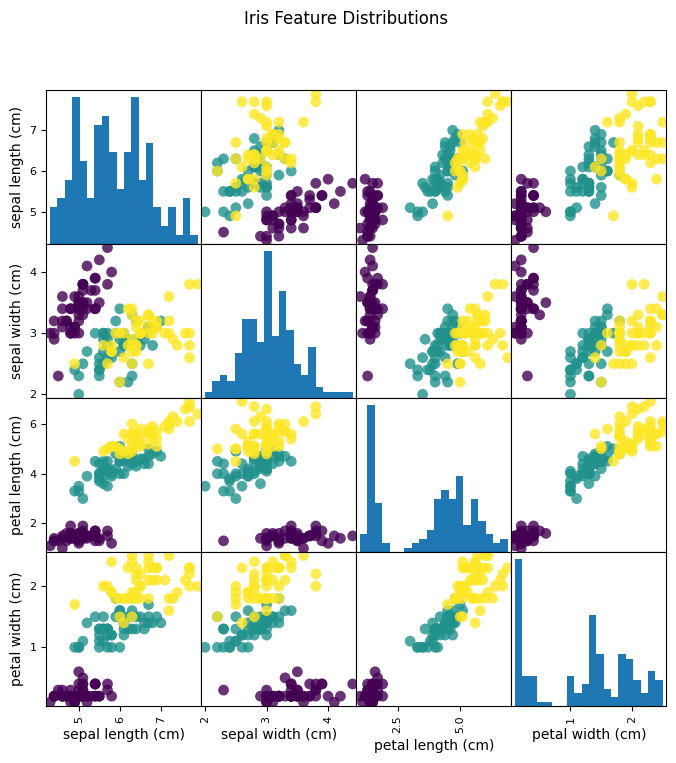

In [4]:
# Visualize feature distributions
pd.plotting.scatter_matrix(df.iloc[:, :4], c=y, figsize=(8,8), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.suptitle('Iris Feature Distributions')
plt.show()

## 4. Preprocess Data
Select features, encode labels, and split into train/test sets.

In [5]:
# For visualization, use only first two features (sepal length, sepal width)
X_vis = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

## 5. Train Decision Tree Models
Fit custom decision tree models on the training data.

In [6]:
# Train classification decision tree only
tree = DecisionTree(max_depth=4, stump_class=ClassificationStumpInfoGain)
tree.fit(X_train, y_train)

## 6. Evaluate Model Performance
Compute accuracy and confusion matrix for each model on the test set.

In [7]:
# Predict and evaluate
y_pred_tree = tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.8


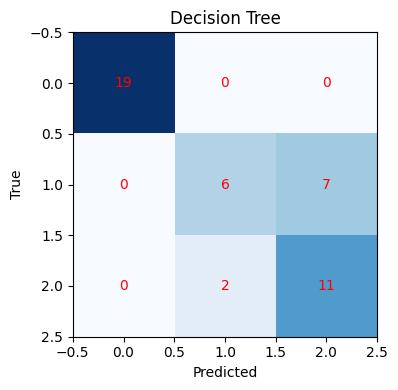

In [8]:
# Confusion matrix for Decision Tree
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_tree)
im = ax.imshow(cm, cmap='Blues')
ax.set_title('Decision Tree')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.tight_layout()
plt.show()

## 7. Visualize Decision Boundaries
Plot decision boundaries for each model using the first two features.

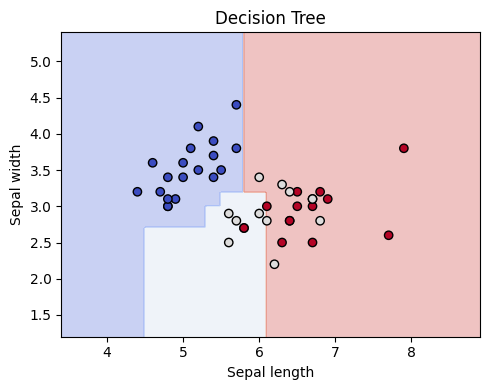

In [9]:
# Decision boundary plotting function
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(title)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    return scatter

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
plot_decision_boundary(tree, X_test, y_test, ax, 'Decision Tree')
plt.tight_layout()
plt.show()

## 8. Plot Model Predictions vs. True Labels
Visualize predictions compared to true labels using scatter plots.

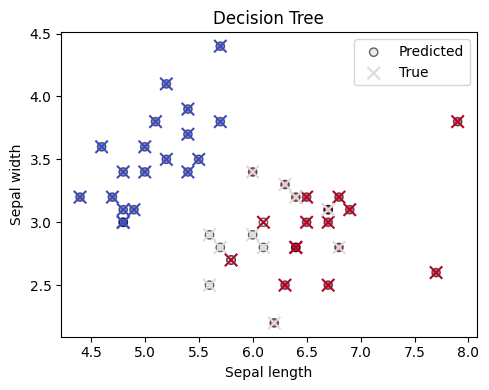

In [10]:
# Scatter plot of predictions vs true labels for Decision Tree
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
scatter_pred = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_tree, cmap=plt.cm.coolwarm, marker='o', edgecolor='k', label='Predicted', alpha=0.6)
scatter_true = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=80, alpha=1.0, label='True')
ax.set_title('Decision Tree')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.legend()
plt.tight_layout()
plt.show()

## 9. Regression Tree Demo
Now, let's test the RegressionStump and recursive DecisionTree on a regression dataset (Boston Housing).

In [11]:
# Import regression stump
from models.decision_tree import RegressionStump

In [12]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X_california = california.data
y_california = california.target
feature_names_california = california.feature_names
df_california = pd.DataFrame(X_california, columns=feature_names_california)
df_california['target'] = y_california
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


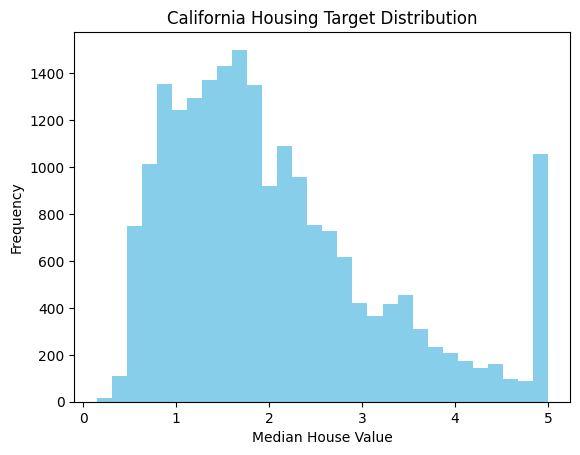

In [13]:
# Visualize target distribution
plt.hist(y_california, bins=30, color='skyblue')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('California Housing Target Distribution')
plt.show()

In [14]:
# Use only two features for visualization (e.g., MedInc and AveRooms)
X_california_vis = df_california[['MedInc', 'AveRooms']].values
y_california_vis = y_california
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california_vis, y_california_vis, test_size=0.3, random_state=42)

In [15]:
# Train regression decision tree only
tree_reg = DecisionTree(max_depth=7, stump_class=RegressionStump)
tree_reg.fit(X_train_california, y_train_california)

In [16]:
# Predict and evaluate regression models
from sklearn.metrics import mean_squared_error, r2_score
y_pred_tree_reg = tree_reg.predict(X_test_california)
mse = mean_squared_error(y_test_california, y_pred_tree_reg)
print('Regression Tree MSE:', mse)
print('RMSE:', np.sqrt(mse))
print('Baseline Variance:', np.var(y_test_california, ddof=0))
print('Regression Tree R2:', r2_score(y_test_california, y_pred_tree_reg))

Regression Tree MSE: 0.6286718138222154
RMSE: 0.7928882732278334
Baseline Variance: 1.3125401078138632
Regression Tree R2: 0.5210265880032293


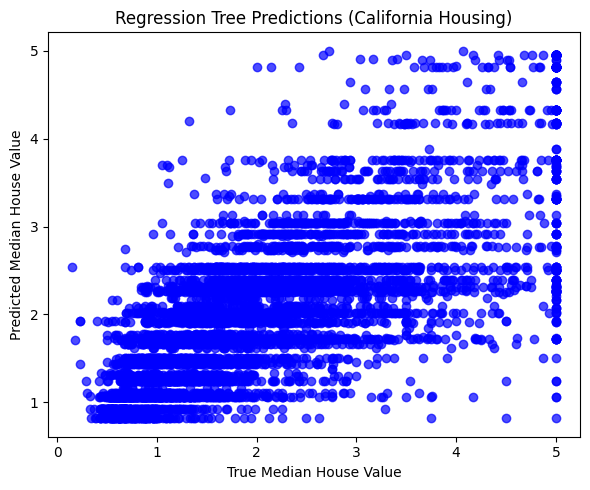

In [17]:
# Plot predictions vs true values
plt.figure(figsize=(6,5))
plt.scatter(y_test_california, y_pred_tree_reg, alpha=0.7, color='blue')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Regression Tree Predictions (California Housing)')
plt.tight_layout()
plt.show()

## 10. Effect of Tree Depth on Performance
Let's train decision trees with varying depths for both classification and regression, and plot the error over depth.

In [18]:
# Vary tree depth for classification and regression
depths = range(1, 9)
classification_errors = []
regression_mse = []
regression_r2 = []
for d in depths:
    # Classification
    tree_cls = DecisionTree(max_depth=d, stump_class=ClassificationStumpInfoGain)
    tree_cls.fit(X_train, y_train)
    y_pred_cls = tree_cls.predict(X_test)
    error_cls = 1 - accuracy_score(y_test, y_pred_cls)
    classification_errors.append(error_cls)
    # Regression
    tree_reg = DecisionTree(max_depth=d, stump_class=RegressionStump)
    tree_reg.fit(X_train_california, y_train_california)
    y_pred_reg = tree_reg.predict(X_test_california)
    mse_reg = mean_squared_error(y_test_california, y_pred_reg)
    r2_reg = r2_score(y_test_california, y_pred_reg)
    regression_mse.append(mse_reg)
    regression_r2.append(r2_reg)

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.19999999999999996, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446, 0.24444444444444446]


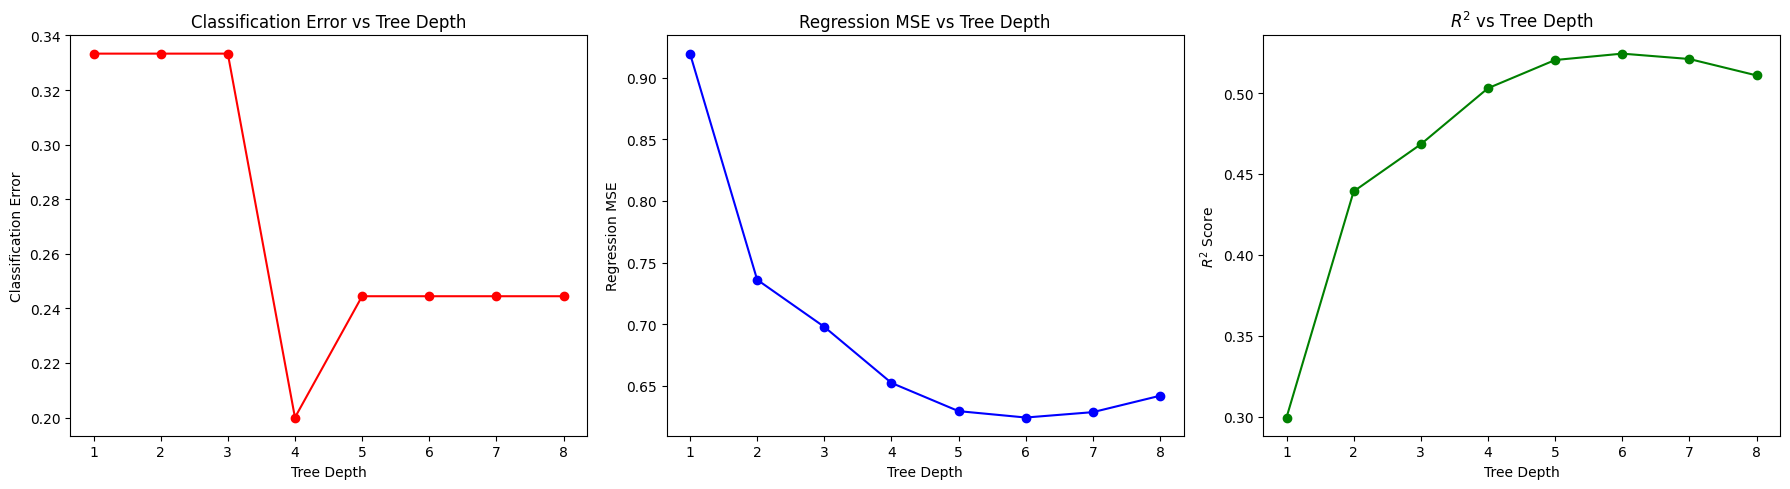

In [21]:
# Plot error and R^2 vs tree depth
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(depths, classification_errors, marker='o', color='red')
print(classification_errors)
ax[0].set_xlabel('Tree Depth')
ax[0].set_ylabel('Classification Error')
ax[0].set_title('Classification Error vs Tree Depth')
ax[1].plot(depths, regression_mse, marker='o', color='blue')
ax[1].set_xlabel('Tree Depth')
ax[1].set_ylabel('Regression MSE')
ax[1].set_title('Regression MSE vs Tree Depth')
ax[2].plot(depths, regression_r2, marker='o', color='green')
ax[2].set_xlabel('Tree Depth')
ax[2].set_ylabel('$R^2$ Score')
ax[2].set_title('$R^2$ vs Tree Depth')
plt.tight_layout()
plt.show()

You can see the overfitting towards the end.